# Système matriciel non linéaire

Si la matrice A dépend de ${\bf x}$, ce qu'on écrit $A({\bf x})$, alors le système
matriciel 

$$
A({\bf x}) \, {\bf x} = {\bf b}
$$

n'est pas linéaire.

#### Exemple

$$
\begin{bmatrix}
1 &  x_1 \\
2x_1 & -x_2 \\
\end{bmatrix}
\;
\begin{bmatrix}
x_{1} \\
x_{2} \\
\end{bmatrix}
=
\begin{bmatrix}
b_{1} \\
b_{2} \\
\end{bmatrix}
$$

donne le système suivant qui n'est clairement pas linéaire puisqu'on a des
carrés :

$$
\begin{align}
x_1 + x_1 \, x_2 &= b_1 \\
2 \, x_1^2  - x_2^2 &= b_2 
\end{align}
$$

Comment résoudre un tel système ? A-t-il une solution ?

On voit bien qu'il y a toujours autant d'équations que d'inconnues donc il y a
de l'espoir. Par contre on sait que les équations du 2e degré ont plusieurs solutions donc il devrait en être de même dans certains cas.

### La méthode du point fixe

La méthode du point fixe consiste à appliquer l'algorithme itératif suivant :

$$
{\bf x}^{k+1} = {\bf g}({\bf x}^k)
$$

dans le but de résoudre l'équation ${\bf g}({\bf x}) = {\bf x}$.

Si vous ne connaissez pas cette méthode voici un exemple d'utilisation en 1D avec
la courbe $g$ dessinée pour bien comprendre.

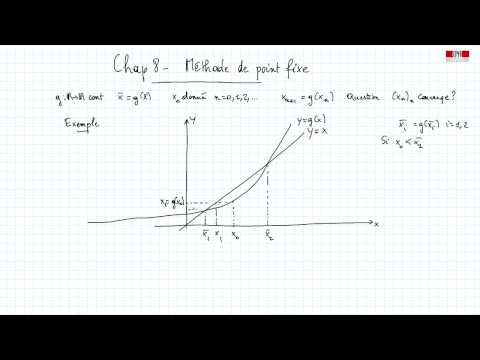

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('ufPZOgrdHK4')

On voit (si on a regardé la vidéo), on sait (sinon) que suivant le point de départ, la méthode converge ou diverge.


Regardons comment on peut résoudre notre système non linéaire avec la méthode du point fixe.

### La méthode du point fixe pour résoudre $A({\bf x}) \, {\bf x} = {\bf b}$

La première chose est de définir la fonction $\bf g$ telle que la solution de 
${\bf g}({\bf x}) = {\bf x}$ soit aussi la solution du système matriciel non linéaire.
Cela implique que ${\bf g}$ est :

$$
{\bf g}({\bf x}) = A^{-1}({\bf x}) \, {\bf b}
$$

Bien sûr on sait qu'inverser A est trop cher aussi on préfère écrire notre
algorithme itératif ${\bf x^{k+1}} = {\bf g}({\bf x^k})$  sous forme de problème matriciel linéaire à résoudre :

$$
A({\bf x}^k) \, {\bf x}^{k+1} = {\bf b}
$$

Si on connait ${\bf x}^k$ alors on peut évaluer $A({\bf x}^k)$ et donc il
s'agit d'une matrice de réels. On voit qu'alors le système est bien linéaire
et qu'il permet de trouver ${\bf x}^{k+1}$.

Cet algorithme itératif peut donc marcher mais on sent bien que cela va
dépendre du type de la matrice A (on a l'habitude) et de la valeur initiale
${\bf x}^0$ comme souligné dans la vidéo. De plus on voit qu'il va être
très cher puisqu'on a un système matriciel à résoudre à chaque itération !

### Test

Regardons comment marche cet algorithme pour résoudre


$$
\begin{bmatrix}
x_0 - 2 x_1 &  x_1 \\
x_0 & 2 x_0 + x_1 \\
\end{bmatrix}
\;
\begin{bmatrix}
x_0 \\
x_1 \\
\end{bmatrix}
=
\begin{bmatrix}
1 \\
9 \\
\end{bmatrix}
$$

Il y a deux solutions qui sont [1, 2] et [2, 1].

In [1]:
import numpy as np
import numpy.linalg as lin

def A(x):
    return np.array([[x[0] - 2*x[1], x[1]] ,
                     [x[0] , x[1] + 2*x[0]]]) / 10 

b = np.array([1, 9]) / 10         # avec normalisation grossière

x = np.array([1, 1])
for i in range(1, 10):
    x = lin.solve(A(x), b)
    print(f'x^{i} = ', x, end='  ')
    print(f'erreur² = ', np.square(A(x) @ x - b).sum())

x^1 =  [1.5 2.5]  erreur² =  0.48999999999999977
x^2 =  [0.73913043 1.43478261]  erreur² =  0.18534274820344412
x^3 =  [1.37617066 2.74037461]  erreur² =  0.6387945198307682
x^4 =  [0.72846505 1.45602065]  erreur² =  0.18097695808599654
x^5 =  [1.37323934 2.74623359]  erreur² =  0.6430523663786714
x^6 =  [0.72824232 1.45646606]  erreur² =  0.1808855461166179
x^7 =  [1.37317932 2.74635363]  erreur² =  0.6431399506048754
x^8 =  [0.72823777 1.45647516]  erreur² =  0.1808836795920618
x^9 =  [1.37317809 2.74635608]  erreur² =  0.6431417383272344


La solution oscille sans converger. On peut tester d'autre ${\bf x}^0$ 
mais on obtient souvent le même résultat.

La méthode du point fixe de base a un petit rayon de convergence à savoir il
faut que la valeur initial soit proche de la solution pour converger.

### Appliquons l'inertie

Ou la méthode de surrelaxation qui consite à avancer moins vite vers le prochain
point.

In [6]:
µ = 0.5  # j'avance de moitié vers le prochain x

x = np.array([1.998, 1])
for i in range(1, 10):
    x_old = x
    x = lin.solve(A(x), b)
    x = µ * x + (1-µ) * x_old
    print(f'x^{i} = ', x, end='  ')
    print(f'erreur² = ', np.square(A(x) @ x - b).sum())

x^1 =  [1.99601592 1.00199403]  erreur² =  2.845730924209918e-06
x^2 =  [1.98435526 1.00784963]  erreur² =  4.338186795289511e-05
x^3 =  [1.94167764 1.02955991]  erreur² =  0.00057735040271093
x^4 =  [1.81575881 1.09680461]  erreur² =  0.005006527863139465
x^5 =  [1.58849624 1.23874527]  erreur² =  0.017837680043912996
x^6 =  [1.3654867  1.43296028]  erreur² =  0.023567622207356913
x^7 =  [1.21494033 1.62266463]  erreur² =  0.015938576382362332
x^8 =  [1.12471347 1.76667765]  erreur² =  0.007550226984782101
x^9 =  [1.07194609 1.86111664]  erreur² =  0.0030000984268709436


Et là la convergence est rapide. L'inertie augmente significativement le rayon
de convergence de la méthode du point fixe (plus µ est petit et plus le rayon
de convergence est grand mais moins on avance vite).

Bien sûr l'algorithme converge vers l'une des solutions et y reste. Il ne peut
pas trouver toutes les solutions. Si on veut trouver au autre solution il y
faut choisir un autre point initial et avoir de la chance d'être dans le 
rayon de convergence de cette autre solution.

## La méthode de Newton-Raphson

Il s'agit d'appliquer la méthode de Newton pour une fonction vectorielle.

Voici une vidéo qui rappelle ce qu'est la méthode de Newton pour une fonction
en 1D. Vous pouvez vous arrêter à la 4e minute.

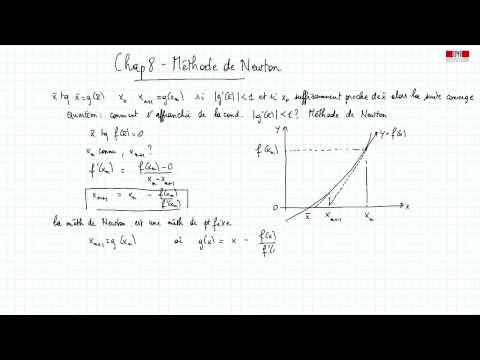

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('h0XUxE47l00')

Dans notre cas on veut toujours résoudre notre système matriciel non linéaire.

On va donc définir la méthode itérative par analogie avec la méthode 1D. En 1D on a :

$$
x^{k+1} = x^k - \frac{f(x^k)}{f'(x^k)}  \quad \textrm{ou bien} \\
f'(x^k) \; (x^{k+1} - x^k) = - f(x^k)
$$
                               
Cela donne en $n$ dimensions :

$$
J_{\bf f}({\bf x}^k) \; ({\bf x}^{k+1} - {\bf x}^k) =  - {\bf f}({\bf x}^k)
$$

avec $J_{\bf f}$ la matrice Jacobienne de ${\bf f}$ :

$$
J_{\bf f}\left({\bf x}\right)=
\begin{pmatrix} 
\dfrac{\partial f_1}{\partial x_1} & \cdots & \dfrac{\partial f_1}{\partial x_n} \\
\vdots & \ddots & \vdots \\
\dfrac{\partial f_n}{\partial x_1} & \cdots & \dfrac{\partial f_n}{\partial x_n}
\end{pmatrix}
$$

et pour notre système non linéaire

$$
{\bf f}({\bf x}) = A({\bf x})\, {\bf x} - {\bf b}
$$

On notera que ${\bf f}$ est une fonction vectorielle à savoir qu'elle retourne
un vecteur.

#### Test

On reprend le même système matriciel :

$$
\begin{bmatrix}
x_0 - 2 x_1 &  x_1 \\
x_0 & 2 x_0 + x_1 \\
\end{bmatrix}
\;
\begin{bmatrix}
x_0 \\
x_1 \\
\end{bmatrix}
=
\begin{bmatrix}
1 \\
9 \\
\end{bmatrix}
$$

La matrice Jacobienne de la fonction ${\bf f}$ définie ci-dessus est : 

$$
J_{\bf f}({\bf x}) = 
\begin{bmatrix}
2 x_0 - 2 x_1 &  2 x_1  - 2 x_0\\
2 x_0 + 2 x_1 & 2 x_0 + 2 x_1 \\
\end{bmatrix}
$$


In [8]:
def f(x):
    return A(x) @ x - b

def J_f(x):
    return 2 * np.array([[x[0] - x[1], x[1] - x[0]],
                         [x[0] + x[1], x[0] + x[1]]])

x = np.array([1, 1.1])
for i in range(30):
    delta = lin.solve(J_f(x), -f(x))
    x = x + delta
    print(f'x^{i} = ', x, end='  ')
    print(f'erreur² = ', np.square(A(x) @ x - b).sum())

x^0 =  [0.80714286 1.40214286]  erreur² =  0.1738391124362817
x^1 =  [0.82661178 1.47589539]  erreur² =  0.14013193945500102
x^2 =  [0.84449678 1.53832416]  erreur² =  0.11305725653981773
x^3 =  [0.86066582 1.59186587]  erreur² =  0.09127299702681221
x^4 =  [0.87518409 1.63820488]  erreur² =  0.07372379277598218
x^5 =  [0.88818095 1.67857971]  erreur² =  0.0595731611254003
x^6 =  [0.89980142 1.71393945]  erreur² =  0.04815469077192336
x^7 =  [0.91018754 1.74503332]  erreur² =  0.038935573039892035
x^8 =  [0.91947123 1.77246602]  erreur² =  0.03148872349291875
x^9 =  [0.92777209 1.79673415]  erreur² =  0.025471148220392294
x^10 =  [0.9351973  1.81825117]  erreur² =  0.020606983474307096
x^11 =  [0.94184231 1.83736516]  erreur² =  0.01667410290306686
x^12 =  [0.94779187 1.85437189]  erreur² =  0.013493486464829903
x^13 =  [0.9531212  1.86952455]  erreur² =  0.010920748632859209
x^14 =  [0.95789703 1.88304134]  erreur² =  0.00883936731257032
x^15 =  [0.96217855 1.89511126]  erreur² =  0.0

On converge alors que la méthode du point fixe oscille 
sans convreger pour cette valeur initiale.

On converge néanmoins moins vite qu'avec la méthode du point fixe sur-relaxée.

**Remarques** sur la méthode de Newton-Raphson

* Le coût de construction de la matrice Jacobienne peut être très lourd
* Une technique pour aller plus vite consiste à dire que d'une itération à une
  autre on n'a pas beaucoup bougé et donc la matrice Jacobienne n'a pas du trop 
  changer. Aussi on recalcule cette matrice que toutes les 3 ou plus itérations
* Il s'agit d'une matrice pleine qu'il rend plus compliqué la résolution du système
  lors de l'iteration (une méthode de gradiant ne marchera pas en général)